In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

Dataset Link
https://www.cis.fordham.edu/wisdm/dataset.php

In [4]:
# Mounting drive
# To access datasets from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_ = pd.read_csv('/content/drive/My Drive/Datasets/Human activity datasets/WISDM_ar_v1.1_raw.txt')

# Returned Error
# Error tokenizing data. C error: Expected 6 fields in line 134634, saw 11
# From above error we know tat line 134634 has 11 fields but required 6
# Also at the end of sixth field there is semicolon and fields
# are separated by comma 

ParserError: ignored

In [6]:
# Thus we are trying to keep only six fields 
# removing semicolon at end of sixth item(i.e 5th index item)
file = open('/content/drive/My Drive/Datasets/Human activity datasets/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()
final_processed_list =[]


for i,line in enumerate(lines):
  try:
      # splitting all row value at ,
      # storing splitted value in array line
      line = line.split(',')
      # Taking fifth element removing semicolon
      last = line[5].split(';')[0]
      # To remove whitespace
      last = last.strip()
 

      # Creating array for storig sixth fields
      # fifth element is last
      temp_list = [line[0],line[1],line[2],line[3],line[4],last]
      # Checking if any fields are empty
      for fields in temp_list:
        if (fields !=''):
          # appending each line into final multidimensional list
          final_processed_list.append(temp_list)
        else:
          print('Null field in list number {list_number} and list is {list}'.format(list_number=i,list = temp_list))

  except:
      print('Error at the line {line_number} and error line is : "{error_line}"'.format(line_number=i,error_line=line))

      




Error at the line 281873 and error line is : "['\n']"
Error at the line 281874 and error line is : "['\n']"
Error at the line 281875 and error line is : "['\n']"
Null field in list number 343419 and list is ['11', 'Walking', '1867172313000', '4.4', '4.4', '']
Error at the line 537501 and error line is : "['\n']"
Error at the line 832901 and error line is : "['\n']"
Error at the line 1098209 and error line is : "['\n']"


In [7]:
len(final_processed_list)

6589223

In [8]:
final_processed_list

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-

In [9]:
columns = ['userId','activity','time','x','y','z']

In [10]:
activity_data = pd.DataFrame(data = final_processed_list,columns = columns)

In [11]:
activity_data.shape

(6589223, 6)

In [12]:
activity_data.head()

,userId,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
2,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
3,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
4,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286


In [13]:
# Checking if any null values are present
activity_data.isnull().sum()
# And we found that there are no null values

userId      0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [14]:
# Checking uniformity of data
activity_data['activity'].value_counts()
# It is seems that standing has only 290370 data but walking and jogging have data more than 10 times
# so we need to make data distribution uniform
# Else  In modelwalking and jogging will be overfitted and skewed 
# Thus we are taking all activity data equal to Standing

Walking       2546387
Jogging       2053056
Upstairs       737214
Downstairs     602562
Sitting        359634
Standing       290370
Name: activity, dtype: int64

In [15]:
activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589223 entries, 0 to 6589222
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   userId    object
 1   activity  object
 2   time      object
 3   x         object
 4   y         object
 5   z         object
dtypes: object(6)
memory usage: 301.6+ MB


In [16]:
# From above data information
# We see type of attribue is object
# But for neural network we need numerical data

# Converting x,y,z from object type to float type
activity_data['x'] = activity_data.x.astype('float')
activity_data['y'] = activity_data.x.astype('float')
activity_data['z'] = activity_data.x.astype('float')


In [17]:
activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589223 entries, 0 to 6589222
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   userId    object 
 1   activity  object 
 2   time      object 
 3   x         float64
 4   y         float64
 5   z         float64
dtypes: float64(3), object(3)
memory usage: 301.6+ MB


### **Balancing Data**

In [18]:
# since sampling rate is 20 Hz
Fs = 20
activities = activity_data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

Now we will plot x, y, z for each activity for 10 seconds.

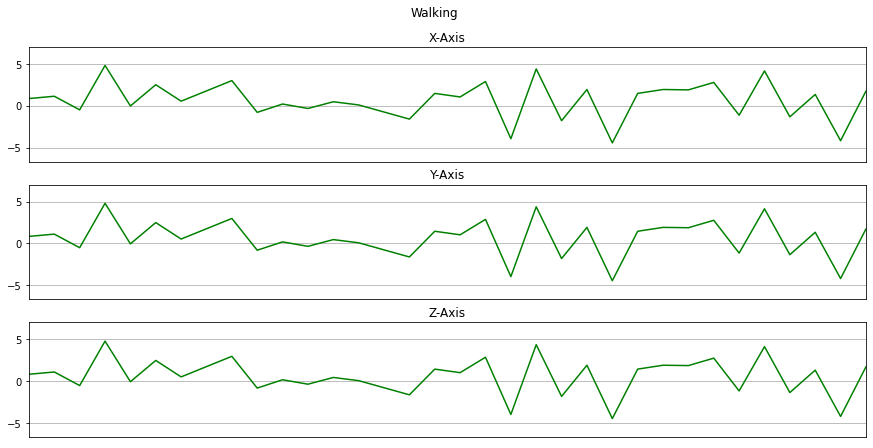

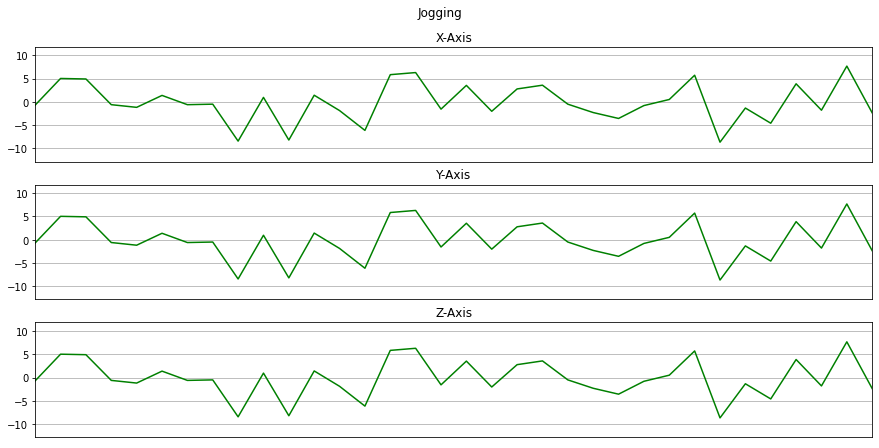

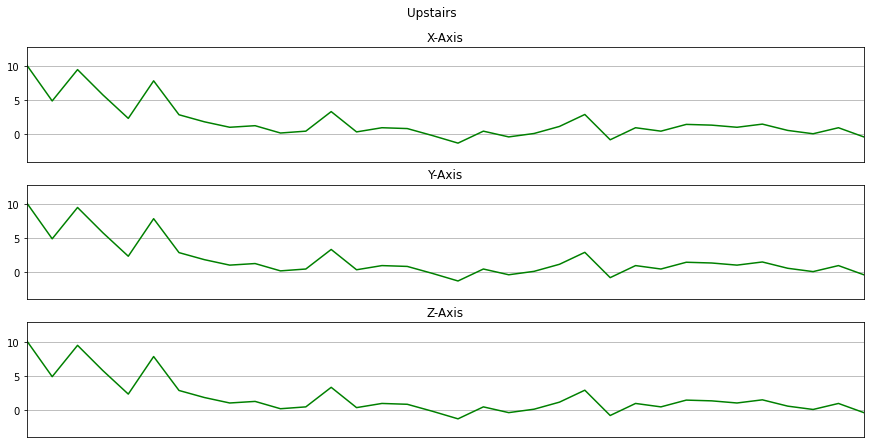

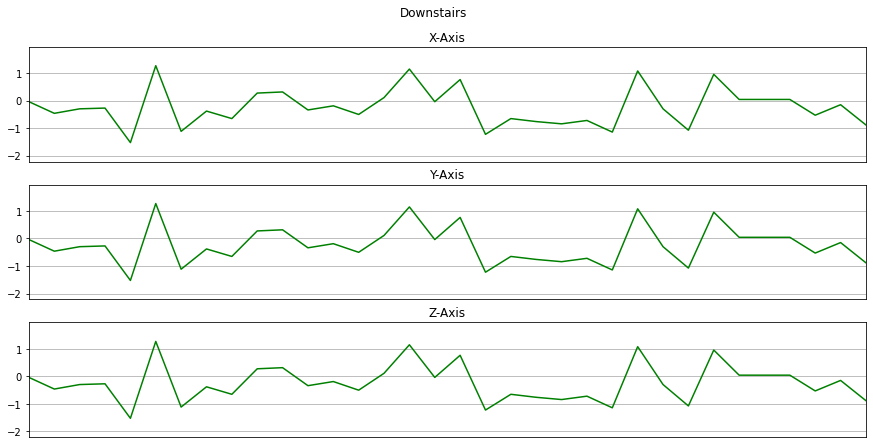

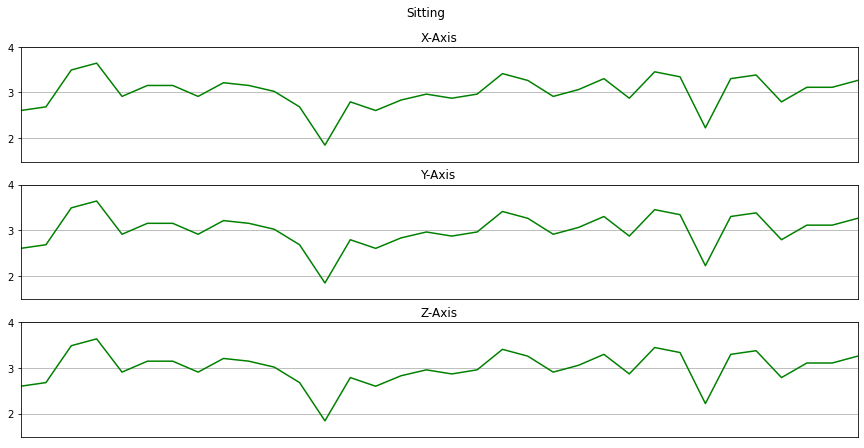

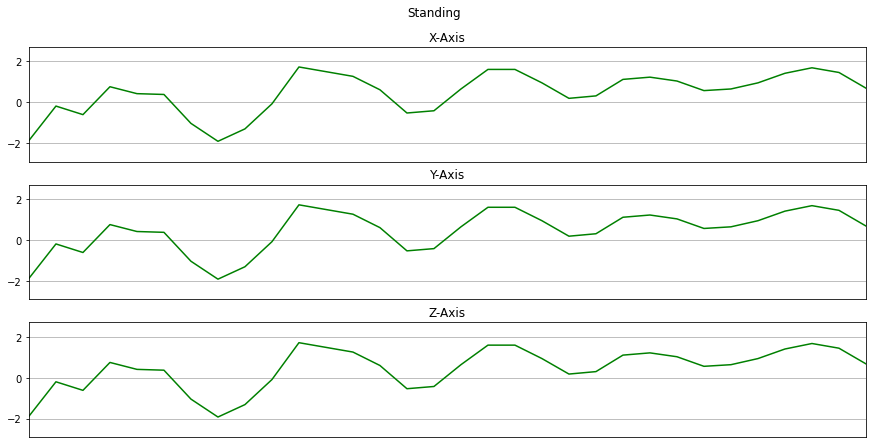

In [22]:
# Copied
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = activity_data[(activity_data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [58]:
# Now dropping time and userID
df = activity_data.drop(['userId','time'],axis =1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,-0.694638,-0.694638
1,Jogging,-0.694638,-0.694638,-0.694638
2,Jogging,-0.694638,-0.694638,-0.694638
3,Jogging,-0.694638,-0.694638,-0.694638
4,Jogging,-0.694638,-0.694638,-0.694638


In [59]:
df['activity'].value_counts()

Walking       2546387
Jogging       2053056
Upstairs       737214
Downstairs     602562
Sitting        359634
Standing       290370
Name: activity, dtype: int64

In [60]:
# Now creating individual activity dataframe with uniform size equal to standing activity
Walking =  df[df['activity'] =='Walking'].head(290370).copy()
Jogging =  df[df['activity'] =='Jogging'].head(290370).copy()
Upstairs =  df[df['activity'] =='Upstairs'].head(290370).copy()
Downstairs =  df[df['activity'] =='Downstairs'].head(290370).copy()
Sitting   =  df[df['activity'] =='Sitting'].head(290370).copy()
Standing   =  df[df['activity'] =='Standing'].head(290370).copy()

In [64]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking,Jogging,Upstairs,Downstairs,Sitting,Standing])
balanced_data.head()

,activity,x,y,z
3582,Walking,0.844462,0.844462,0.844462
3583,Walking,0.844462,0.844462,0.844462
3584,Walking,0.844462,0.844462,0.844462
3585,Walking,0.844462,0.844462,0.844462
3586,Walking,0.844462,0.844462,0.844462


In [65]:
balanced_data.shape

(1742220, 4)

In [66]:
# Checking whether all activity are balanced or not
balanced_data['activity'].unique()

array(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

In [67]:
balanced_data['activity'].value_counts()

Walking       290370
Upstairs      290370
Standing      290370
Sitting       290370
Jogging       290370
Downstairs    290370
Name: activity, dtype: int64

In [73]:
# Encoding our activity to categorical value
# six classes to 0-5
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
3582,Walking,0.844462,0.844462,0.844462,5
3583,Walking,0.844462,0.844462,0.844462,5
3584,Walking,0.844462,0.844462,0.844462,5
3585,Walking,0.844462,0.844462,0.844462,5
3586,Walking,0.844462,0.844462,0.844462,5


In [74]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

### **Standardization of data**

In [75]:
X = balanced_data[['x','y','z']]
Y = balanced_data['label']

In [76]:
# Now converting x,y,z into similar scale (variance) using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_data = pd.DataFrame(X,columns=['x','y','z'])
scaled_data['label'] = Y.values

scaled_data.head()

,x,y,z,label
0,-0.034489,-0.034489,-0.034489,5
1,-0.034489,-0.034489,-0.034489,5
2,-0.034489,-0.034489,-0.034489,5
3,-0.034489,-0.034489,-0.034489,5
4,-0.034489,-0.034489,-0.034489,5


In [81]:
scaled_data.shape

(1742220, 4)

In [77]:
scaled_data['label'].value_counts()

5    290370
4    290370
3    290370
2    290370
1    290370
0    290370
Name: label, dtype: int64

### Frame preparation

We are going to divide the data into frames of 4 seconds. To do this we will import scipy.stats.

In [79]:
import scipy.stats as stats

In [78]:
# We are considering 4 second for an activity
Fs=20
frame_size = Fs *4 # 80
hop_size = Fs*2

`get_frames()` creates frames of 4 seconds i.e. 80 observations with advancement of 40 observations. The label for this 4 seconds frame is the mode of the labels for the 80 observations which make the 4 seconds frame. `get_frames()` returns two np.arrays: frames containing all the 4 second frames and labels containing its corresponding labels. These are stored in `X `and `y `respectively. X contains 532 frames, each having 80 values of `x, y, z. y` containes 532 labels for the frames in `X`

In [80]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_data, frame_size, hop_size)

X.shape, y.shape

((43554, 80, 3), (43554,))

In [84]:
(290370 * 6)/(80/2)
# Total size of our activity is 290370*6
# hop size is 40


43555.5

In [85]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =101,stratify = y)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34843, 80, 3), (8711, 80, 3), (34843,), (8711,))

In [87]:
# Checking dimension of input data
x_train[0].shape,x_test[0].shape

((80, 3), (80, 3))

In [89]:
# Since @D CNN model takes input 3D data 
# Thus reshaping data

x_train = x_train.reshape(34843, 80, 3,1)
x_test = x_test.reshape(8711,80,3,1)
# Now shape becomes 3D
x_train[0].shape,x_test[0].shape


((80, 3, 1), (80, 3, 1))

**Build 2D CNN Model**

In [142]:
model = Sequential()
model.add(Conv2D(32,(2,2),activation='relu',padding='same',input_shape= x_train[0].shape))
model.add(Conv2D(64,(2,2),padding='same',activation='relu'))


model.add(Conv2D(128,(2,2),padding='same',activation='relu'))
model.add(MaxPool2D(2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(6,activation='softmax'))

In [143]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 80, 3, 32)         160       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 80, 3, 64)         8256      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 80, 3, 128)        32896     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 40, 1, 128)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                327744    
_________________________________________________________________
dense_19 (Dense)             (None, 6)               

In [144]:
model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [145]:
# Recording model training
history= model.fit(x_train,y_train,epochs = 10,validation_split=0.2,verbose=1)

Epoch 1/10
872/872 [==============================] - 53s 61ms/step - loss: 0.8895 - accuracy: 0.5873 - val_loss: 0.8056 - val_accuracy: 0.6437
Epoch 2/10
872/872 [==============================] - 51s 59ms/step - loss: 0.7560 - accuracy: 0.6587 - val_loss: 0.7556 - val_accuracy: 0.6609
Epoch 3/10
872/872 [==============================] - 52s 59ms/step - loss: 0.6828 - accuracy: 0.6948 - val_loss: 0.6551 - val_accuracy: 0.7200
Epoch 4/10
872/872 [==============================] - 54s 62ms/step - loss: 0.6272 - accuracy: 0.7253 - val_loss: 0.6624 - val_accuracy: 0.7063
Epoch 5/10
872/872 [==============================] - 52s 59ms/step - loss: 0.5860 - accuracy: 0.7421 - val_loss: 0.6325 - val_accuracy: 0.7299
Epoch 6/10
872/872 [==============================] - 52s 60ms/step - loss: 0.5509 - accuracy: 0.7585 - val_loss: 0.6137 - val_accuracy: 0.7396
Epoch 7/10
872/872 [==============================] - 53s 60ms/step - loss: 0.5232 - accuracy: 0.7711 - val_loss: 0.6099 - val_accuracy:

In [146]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

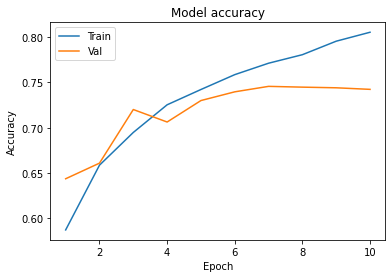

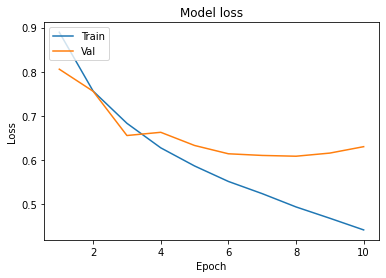

In [147]:
plot_learningCurve(history,10)

In [148]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [149]:
y_pred = model.predict_classes(x_test)

In [150]:
cmt = confusion_matrix(y_test,y_pred)

In [151]:
cmt

array([[ 735,   80,    1,   12,  445,  179],
       [  35, 1353,    1,    0,   42,   21],
       [   5,    1, 1026,  400,   16,    4],
       [   4,    0,  107, 1314,   25,    1],
       [ 453,   69,    1,   31,  786,  112],
       [ 126,   42,    2,    0,   43, 1239]])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f44de869550>)

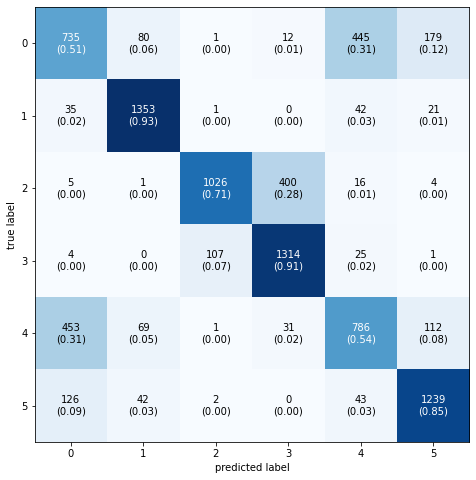

In [154]:
plot_confusion_matrix(conf_mat = cmt,show_normed=True,figsize =(8,8))

Saving Model

In [155]:
# Testing
model.save_weights('Human activity recognition model.h5')